<a href="https://colab.research.google.com/github/KoMurase/tutorials/blob/master/tutorial_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import torchvision
import numpy as np 

In [0]:
#Tensor変換したい場合
trans = torchvision.transforms.ToTensor()

#同時に正規化したい場合
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])

In [0]:
class Plus2(object):
    def __init__(self):
        pass
    def __call__(self, x):
        data = x + 2
        return data

In [0]:
trans = Plus2()
x = 9
data = trans(x)

In [4]:
print(x)
print(data)

9
11


In [0]:
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])

In [0]:
trainset = torchvision.datasets.MNIST(root = 'path', train = True, download = True, transform = trans)

In [13]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [14]:
trainset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [16]:
trainset[0][0].shape 

torch.Size([1, 28, 28])

In [18]:
trainset[0][1] #ラベル

5

In [0]:
class Mydatasets(torch.utils.data.Dataset):
    def __init__(self, transform = None):
        self.transform = transform

        self.data = [1, 2, 3, 4, 5, 6]
        self.label = [0, 1, 0, 1, 0, 1]

        self.datanum = 6

    def __len__(self):
        return self.datanum

    def __getitem__(self, idx):
        out_data = self.data[idx]
        out_label = self.label[idx]

        if self.transform:
            out_data = self.transform(out_data)

        return out_data, out_label

In [23]:
t = Plus2()
dataset = Mydatasets(t)
print(len(dataset))
print(dataset[0])
print(dataset[1])
print(dataset[2])
print(dataset[3])
print(dataset[4])
print(dataset[5])
print(dataset[6])

print(dataset)


6
(3, 0)
(4, 1)
(5, 0)
(6, 1)
(7, 0)
(8, 1)


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 100, shuffle = True, num_workers = 2)

In [26]:
for data, label in trainloader:
  break 

print(data)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

In [27]:
print(label)

tensor([9, 7, 6, 7, 1, 8, 4, 7, 9, 9, 8, 3, 3, 0, 6, 9, 2, 4, 3, 0, 6, 2, 5, 9,
        5, 1, 4, 9, 9, 0, 4, 3, 5, 3, 8, 1, 1, 7, 3, 9, 0, 2, 9, 8, 6, 7, 2, 3,
        6, 9, 5, 4, 3, 6, 3, 5, 2, 1, 4, 2, 0, 1, 9, 4, 6, 0, 8, 4, 8, 3, 9, 3,
        1, 6, 9, 6, 3, 4, 3, 9, 2, 6, 0, 1, 1, 3, 0, 4, 4, 4, 8, 7, 5, 2, 1, 2,
        0, 5, 9, 7])


In [0]:
trans1 = torchvision.transforms.ToTensor()
trans2 = torchvision.transforms.Compose([torchvision.transforms.Grayscale(), torchvision.transforms.ToTensor()])

In [0]:
class MyDatasets(torch.utils.data.Dataset):
  def __init__(self, path, transform1=None, transform2=None, train=True):
    self.transform1 = transform1
    self.transform2 = transform2
    self.train = train

    self.labelset = torchvision.datasets.CIFAR10(root=path, train=self.train, download=True)
    self.dataset = torchvision.datasets.CIFAR10(root=path, train=self.train, download=True)

    self.datanum = len(dataset)
  
  def __len__(self):
    return self.datanum 
  
  def __getitem__(self, idx):
    out_label = self.labelset[idx][0]
    out_data = self.dataset[idx][0]

    if self.transform1:
      out_label = self.transform1(out_label)
    
    if self.transform2:
      out_data = self.transform2(out_data)
    
    return out_label, out_label 

In [39]:
dataset = MyDatasets('../', transform1=trans1, transform2=trans2, train=True)
print(dataset[0][0].shape)
print(dataset[0][1].shape)

Extracting ../cifar-10-python.tar.gz to ../
Files already downloaded and verified
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


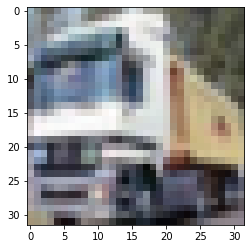

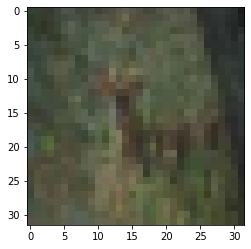

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

ts = torchvision.transforms.ToPILImage()
im = ts(dataset[1][0])
plt.imshow(np.array(im),  cmap='gray')
plt.show()

im = ts(dataset[10][1])
plt.imshow(np.array(im))

In [0]:
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 100, shuffle = True, num_workers = 2)

In [0]:
class ToNDarray(object):
    def __init__(self):
        pass

    def __call__(self, x):
        x_shape = x.shape    #x=(C,H,W)
        x = x.detach().clone().cpu()   #x=(C,H,W)
        x = x.numpy()   #x=(C,H,W)
        if x_shape[0] == 1:       #C=1の時
            x = x[0]    #x=(H,W)にする
        else:
            x = x.transpose(1,2,0)  #x=(H,W,C)にする
        return x

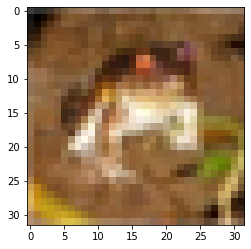

In [46]:
trans = ToNDarray()
im = trans(dataset[0][0])
plt.imshow(im,  cmap='gray')